In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd

In [2]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


# Unfatihful Response

In [3]:
N=128
sX = np.array([i/N* np.pi*2 for i in range(N+1)])

In [4]:
freq=7
ssSin = np.array([np.sin(sX * (freq + j/10)) for j in range(11)])
ssSin.shape

(11, 129)

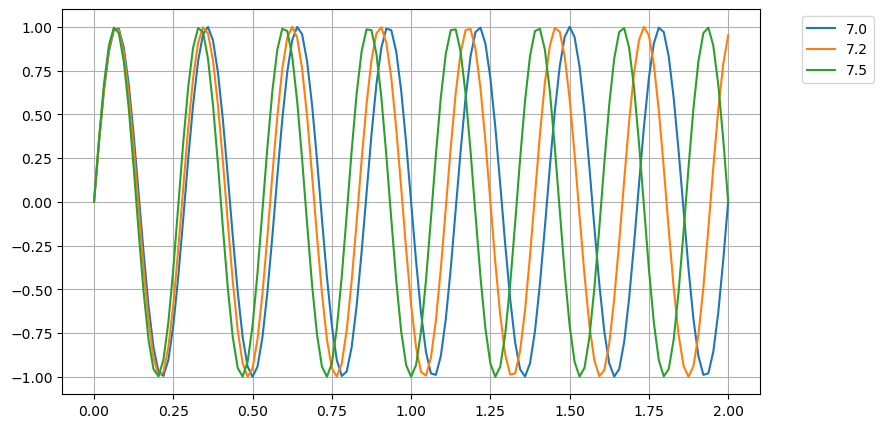

In [5]:
fig, ax = plt.subplots(figsize=(9,5))
for j in [0,2, 5]:
    plt.plot(sX/np.pi, ssSin[j], label=f'{freq + j/10}')
ax.legend()
ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1.0))

In [6]:
ssSpec = sp.fft.fft(ssSin, n=N)
ssSpec.shape

(11, 128)

In [7]:
ssInt = np.abs(ssSpec)
ssInt.shape

(11, 128)

In [8]:
ssAngle = np.angle(ssSpec)
ssAngle.shape

(11, 128)

In [9]:
sFreq = np.array(range(N//2))
sFreq.shape

(64,)

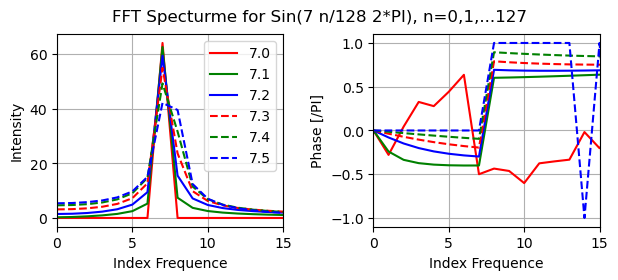

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(7,2.5))
plt.subplots_adjust(wspace=0.4)
fig.suptitle(f'FFT Specturme for Sin({freq} n/{N} 2*PI), n=0,1,...127')
sColor = ['r','g','b']*2
sLine = ['-']*3 + ['--']*3
sStyle = [sColor[j]+sLine[j] for j in range(6)]

ax1.set_xlabel('Index Frequence')
ax1.set_xlim([0, 15])
ax1.set_ylabel('Intensity')
ax1.grid()
for j in range(6):
    ax1.plot(sFreq, ssInt[j][:N//2], sStyle[j], label=f'{freq + j/10}')
ax1.legend()
    
ax2 = plt.subplot(1, 2, 2)
ax2.set_xlabel('Index Frequence')
ax2.set_ylabel('Phase [/PI]')
ax2.grid()
for j in range(6):
    ax2.plot(sFreq, ssAngle[j][:N//2]/np.pi, sStyle[j], label=f'{freq + j/10}')

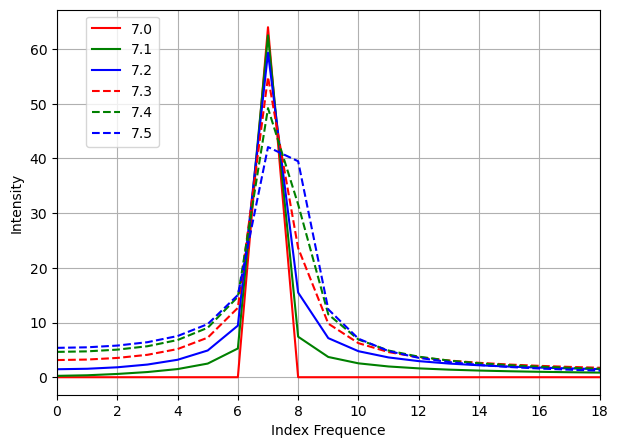

In [11]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set_xlabel('Index Frequence')
ax.set_xlim([0, 18])
ax.set_ylabel('Intensity')
ax.grid()
for j in range(6):
    ax.plot(sFreq, ssInt[j][:N//2], sStyle[j], label=f'{freq + j/10}')
ax.legend(bbox_to_anchor=(0.2, 1.0))

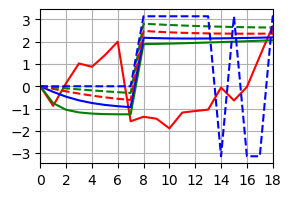

In [12]:
fig, ax = plt.subplots(figsize=(3,2))
#ax.set_xlabel('Index Frequence')
ax.set_xlim([0, 15])
#ax.set_ylabel('Phase')
ax.set_xticks(range(0,19,2))
ax.set_yticks(range(-3,4))
ax.grid()
for j in range(6):
    ax.plot(sFreq, ssAngle[j][:N//2], sStyle[j], label=f'{freq + j/10}')

# Error Resonance

In [13]:
order = 4
size = 1 << order
sWave = [math.sin(math.pi*2 *i/size) for i in range(0,size)]
sWave

[0.0,
 0.3826834323650898,
 0.7071067811865476,
 0.9238795325112867,
 1.0,
 0.9238795325112867,
 0.7071067811865476,
 0.3826834323650899,
 1.2246467991473532e-16,
 -0.38268343236508967,
 -0.7071067811865475,
 -0.9238795325112865,
 -1.0,
 -0.9238795325112866,
 -0.7071067811865477,
 -0.3826834323650904]

In [14]:
sSpec = sp.fft.fft(sWave, n=size)
sSpec

array([ 6.69535287e-17-0.00000000e+00j, -1.23268770e-15-8.00000000e+00j,
       -3.87815369e-16-7.32324654e-16j,  9.95799250e-17-6.66133815e-16j,
        1.22464680e-16-4.99600361e-16j,  9.95799250e-17-6.66133815e-16j,
        6.32744729e-16-2.88235444e-16j,  5.43669135e-16+0.00000000e+00j,
        1.77975831e-16-0.00000000e+00j,  5.43669135e-16-0.00000000e+00j,
        6.32744729e-16+2.88235444e-16j,  9.95799250e-17+6.66133815e-16j,
        1.22464680e-16+4.99600361e-16j,  9.95799250e-17+6.66133815e-16j,
       -3.87815369e-16+7.32324654e-16j, -1.23268770e-15+8.00000000e+00j])

In [15]:
sWave = sp.fft.ifft(sSpec, n=size)
sWave

array([ 0.00000000e+00+0.j,  3.82683432e-01+0.j,  7.07106781e-01+0.j,
        9.23879533e-01+0.j,  1.00000000e+00+0.j,  9.23879533e-01+0.j,
        7.07106781e-01+0.j,  3.82683432e-01+0.j,  1.22464680e-16+0.j,
       -3.82683432e-01+0.j, -7.07106781e-01+0.j, -9.23879533e-01+0.j,
       -1.00000000e+00+0.j, -9.23879533e-01+0.j, -7.07106781e-01-0.j,
       -3.82683432e-01+0.j])

In [16]:
def ReverseError(order):
    freq = 1 << (order - 2)
    size = 1 << order
    sSpec = [0]*size
    sSpec[freq] = -size*0.5j
    sSpec[size - freq] = size*0.5j
    sWave = sp.fft.ifft(sSpec, n=size)
    sSin = np.array([math.sin(math.pi*2*freq *i/size) for i in range(0,size)])
    sDiff = sWave - sSin 
    return sWave, sSin, sDiff

In [17]:
sWave, sSin, sDiff = ReverseError(4)
for i, wave, sin, diff in zip(range(len(sWave)), sWave, sSin, sDiff):
    print(f'{i}\t{wave}\t{sin}\t{diff}')

0	0j	0.0	0j
1	(1+0j)	1.0	0j
2	0j	1.2246467991473532e-16	(-1.2246467991473532e-16+0j)
3	(-1+0j)	-1.0	0j
4	0j	-2.4492935982947064e-16	(2.4492935982947064e-16+0j)
5	(1+0j)	1.0	0j
6	0j	3.6739403974420594e-16	(-3.6739403974420594e-16+0j)
7	(-1+0j)	-1.0	0j
8	0j	-4.898587196589413e-16	(4.898587196589413e-16+0j)
9	(1+0j)	1.0	0j
10	0j	6.123233995736766e-16	(-6.123233995736766e-16+0j)
11	(-1+0j)	-1.0	0j
12	0j	-7.347880794884119e-16	(7.347880794884119e-16+0j)
13	(1+0j)	1.0	0j
14	0j	8.572527594031472e-16	(-8.572527594031472e-16+0j)
15	(-1+0j)	-1.0	0j


In [18]:
sWave, sSin, sDiff = ReverseError(6)

Text(0.5, 1.0, 'Error of sin(j 2$\\pi$ $2^4/2^6$)')

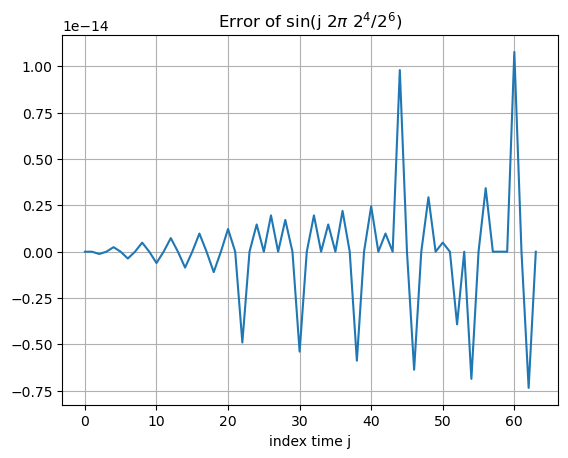

In [28]:
fig, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel('index time j')
ax.plot(range(len(sDiff)), [c.real() if type(c) == complex else c for c in sDiff], label='Sin Error')
ax.set_title('Error of sin(j 2$\pi$ $2^4/2^6$)')